In [1]:
import numpy as np
import joblib

echoes = x_train[:,[6,14,16,27,34,35,37]].copy() <br>
pftCrop, GDP, Distance_to_populated_area, Livestock, road_density, pop_density

This section will analyze the results of pftCrop

In [2]:
model = joblib.load('../output/zeros/feature0.joblib')

In [6]:
x_test  = np.load('../data/test_zeros.npy')
x_test.shape

(13921851, 38)

In [7]:
y_test = np.copy(x_test[:,15])
space_time = np.copy(x_test[:,[0,1,2]])
x_test = np.delete(x_test,[0,1,2,14,15,16,18,19,21,22,23,24,25,26,27,32,34,35,36,37],axis = 1)
y_test.shape

(13921851,)

In [8]:
y_pred = model.predict(x_test)

In [9]:
x = np.linspace(-89.5,90,720)
y = np.linspace(-179.5,180,1440)
lons,lats = np.meshgrid(y,x)
grid = np.zeros((720,1440))

In [72]:
jan = np.mean(np.reshape(y_test,(-1,57)),axis = 1)

In [73]:
jan.shape

(244243,)

In [74]:
lat = np.reshape(space_time[:,0],(-1,57))[:,0]
lon = np.reshape(space_time[:,1],(-1,57))[:,0]
jan = jan.reshape((-1,1))

In [75]:
jan = np.append(lon.reshape(-1,1),jan,axis = 1)#lon
jan = np.append(lat.reshape(-1,1),jan,axis = 1)#lat

In [76]:
jan[:,0]

array([-55.75, -55.5 , -55.5 , ...,  83.75,  83.75,  83.75])

In [77]:
for i in range(jan.shape[0]):
    #print(jan[:,0][i],jan[:,1][i])
    #print((jan[:,0][i]+89.5)*4,(jan[:,1][i]+179.5)*4)
    grid[int(jan[:,0][i]+89.5)*4][int(jan[:,1][i]+179.5)*4] = jan[:,2][i]

In [78]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import gc
%matplotlib inline

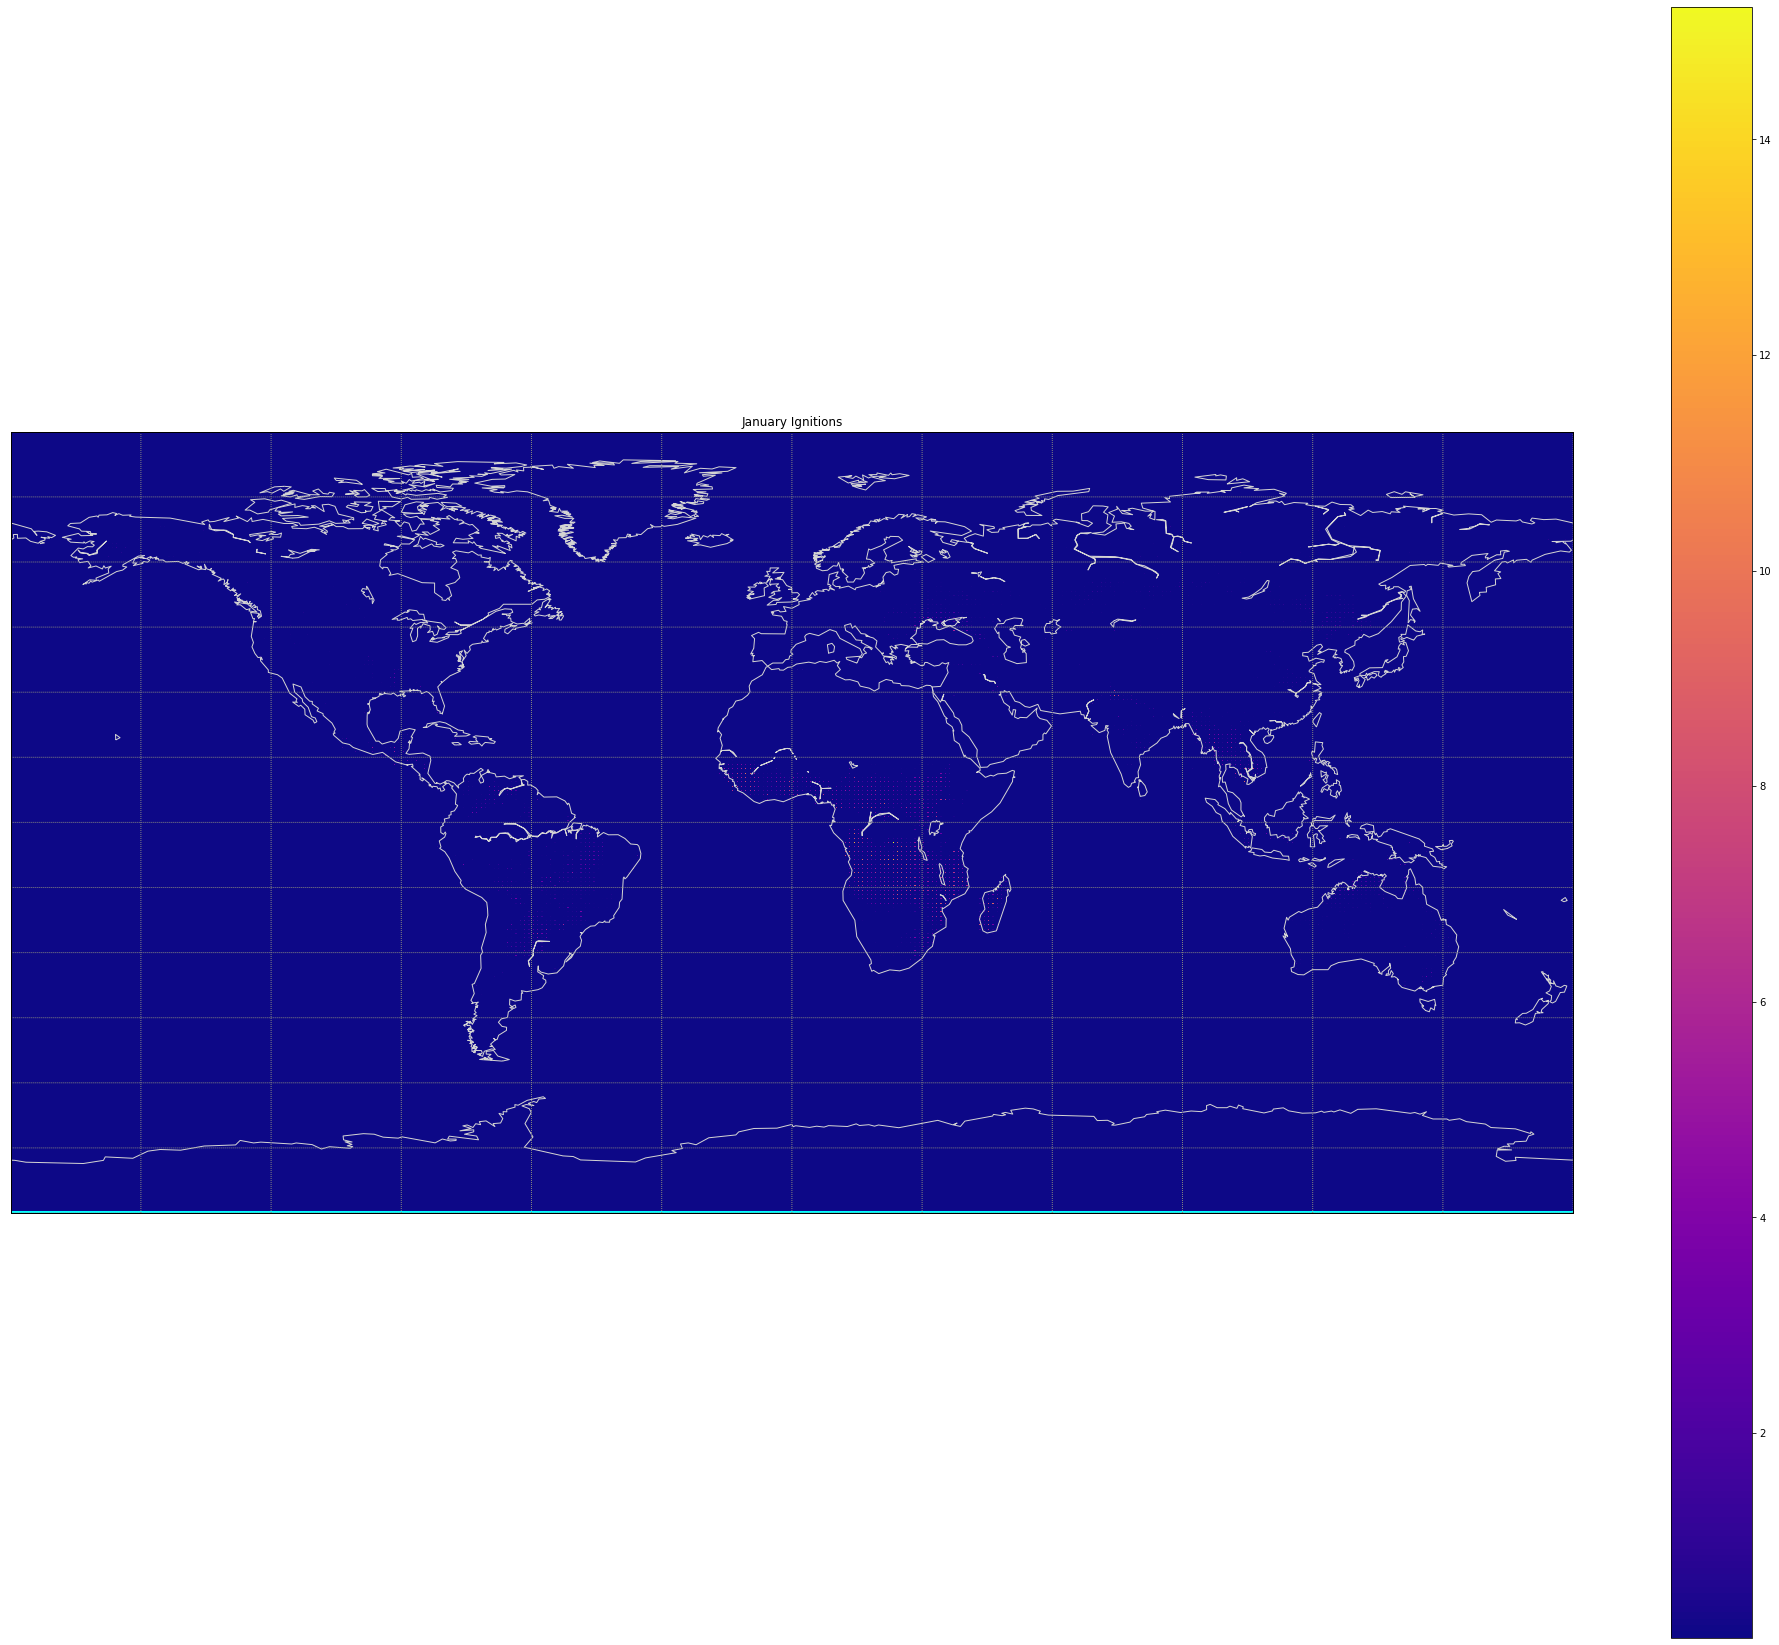

In [79]:
#from matplotlib.pyplot import rainbow_r
fig = plt.figure(figsize=(35,30), edgecolor='w')
map = Basemap(projection='cyl',resolution='c',llcrnrlat=-90,urcrnrlat=90,
            llcrnrlon=-180,urcrnrlon=180)
#map = Basemap(projection='robin', resolution='l',lon_0=0)

map.pcolormesh(lons,lats,grid,vmin = 0.1,cmap = 'plasma')#Capping it at 20, to see better
map.drawcoastlines(color='lightgray')
#map.pcolormesh(lons,lats,grid)
#map.fillcontinents(color='black',lake_color='aqua')
map.drawmapboundary(fill_color='aqua')

map.drawparallels(np.arange(-90.,91.,15.),color='grey')
map.drawmeridians(np.arange(-180.,181.,30.),color='grey')
plt.title("January Ignitions")
plt.colorbar()
plt.show()

In [58]:
import numpy as np
arr = np.arange(20)
arr = arr.reshape((4,5))

In [59]:
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [60]:
np.mean(arr,axis = 1)

array([ 2.,  7., 12., 17.])

In [61]:
arr.shape

(4, 5)

In [5]:
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
a = [1, 1, 2, 3, 4]
b = [2, 2, 3, 2, 1]
c = [4, 6, 7, 8, 9]
d = [4, 3, 4, 5, 4]

ck = np.column_stack([a, b, c, d])

vif = [variance_inflation_factor(ck, i) for i in range(ck.shape[1])]
print(vif)

[47.136986301369774, 28.93150684931508, 80.31506849315096, 40.43835616438355]


In [2]:
a = [1, 1, 2, 3, 4]
b = [2, 2, 3, 2, 1]
c = [4, 6, 7, 8, 9]
d = [4, 3, 4, 5, 4]
e = [1 ,1, 1, 1, 1]

ck = np.column_stack([a, b, c, d,e])

vif = [variance_inflation_factor(ck, i) for i in range(ck.shape[1])]
print(vif)

[22.949999999999985, 3.0000000000000018, 12.950000000000006, 3.0000000000000027, 136.87499999999918]


In [3]:
ck.shape

(5, 5)

In [4]:
ck

array([[1, 2, 4, 4, 1],
       [1, 2, 6, 3, 1],
       [2, 3, 7, 4, 1],
       [3, 2, 8, 5, 1],
       [4, 1, 9, 4, 1]])